# Power Outages
This project uses major power outage data in the continental U.S. from January 2000 to July 2016. Here, a major power  outage is defined as a power outage that impacted at least 50,000 customers or caused an unplanned firm load loss of atleast 300MW. Interesting questions to consider include:
- Where and when do major power outages tend to occur?
- What are the characteristics of major power outages with higher severity? Variables to consider include location, time, climate, land-use characteristics, electricity consumption patterns, economic characteristics, etc. What risk factors may an energy company want to look into when predicting the location and severity of its next major power outage?
- What characteristics are associated with each category of cause?
- How have characteristics of major power outages changed over time? Is there a clear trend?

### Getting the Data
The data is downloadable [here](https://engineering.purdue.edu/LASCI/research-data/outages/outagerisks).

A data dictionary is available at this [article](https://www.sciencedirect.com/science/article/pii/S2352340918307182) under *Table 1. Variable descriptions*.

### Cleaning and EDA
- Note that the data is given as an Excel file rather than a CSV. Open the data in Excel or another spreadsheet application and determine which rows and columns of the Excel spreadsheet should be ignored when loading the data in pandas.
- Clean the data.
    - The power outage start date and time is given by `OUTAGE.START.DATE` and `OUTAGE.START.TIME`. It would be preferable if these two columns were combined into one datetime column. Combine `OUTAGE.START.DATE` and `OUTAGE.START.TIME` into a new datetime column called `OUTAGE.START`. Similarly, combine `OUTAGE.RESTORATION.DATE` and `OUTAGE.RESTORATION.TIME` into a new datetime column called `OUTAGE.RESTORATION`.
- Understand the data in ways relevant to your question using univariate and bivariate analysis of the data as well as aggregations.

*Hint 1: pandas can load multiple filetypes: `pd.read_csv`, `pd.read_excel`, `pd.read_html`, `pd.read_json`, etc.*

*Hint 2: `pd.to_datetime` and `pd.to_timedelta` will be useful here.*

*Tip: To visualize geospatial data, consider [Folium](https://python-visualization.github.io/folium/) or another geospatial plotting library.*

### Assessment of Missingness
- Assess the missingness of a column that is not missing by  design.

### Hypothesis Test
Find a hypothesis test to perform. You can use the questions at the top of the notebook for inspiration.

# Summary of Findings

### Introduction
In this project, we will look at the major power outage data in the continental U.S. from January 2000 to July 2016. Loading the data from excel to pandas dataframe, we see that it has 1534 observations (each occurence of outage), and 56 columns (location, cause, influential factors, time-stamp, aftermath of the outage etc.)

### Cleaning and EDA
To begin with, we load in the dataset while skipping the first 5 rows(empty and should be ignored), dropped the `Variable` column which takes no values, and the `OBS` column which stands for the observation of each row, obtained by simply adding index by one, which is quite repetitive.

Noticing two pairs of columns [`OUTAGE.START.DATE`, `OUTAGE.START.TIME`], and [`OUTAGE.RESTORATION.DATE`, `OUTAGE.RESTORATION.TIME`] we combined each pair into a single column `OUTAGE.START` and `OUTAGE.RESTORATION` respectively for more convenient timestamp calculation.

Then, to carry out EDA and better explore the data, we first looked at the proportion of missingness in each column, examined the summary statistics and plotted the distribution for both `OUTAGE.DURATION` and `CUSTOMERS.AFFECTED`, we observed that they are both right tailed. However, no apparent correlations between these two columns are spotted as we saw their scattered plot.

We also found an intereting feature of the data in geospatial aspect. Since the dataset contains all 50 states of U.S., we used the package folium to plot a choropleth map of the power outage durations of each state using each state's geodata online. It turns out that New York state has a predominantly long power outage duration than any other states.

### Assessment of Missingness
TODO

### Hypothesis Test
TODO

# Code

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import datetime
from IPython.display import display
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

In [2]:
import folium

### Cleaning

In [19]:
# This section ensures that we can see all columns
pd.set_option('display.max_columns', None)

In [23]:
# Load the Data
df = pd.read_excel('outage.xlsx', skiprows = 5)
df = df.drop(0).drop(['variables','OBS'], axis = 1).reset_index(drop=True)
df

<ipython-input-23-a974516a62cd>:2: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  df = pd.read_excel('outage.xlsx', skiprows = 5)


,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,OUTAGE.START.DATE,OUTAGE.START.TIME,OUTAGE.RESTORATION.DATE,OUTAGE.RESTORATION.TIME,CAUSE.CATEGORY,CAUSE.CATEGORY.DETAIL,HURRICANE.NAMES,OUTAGE.DURATION,DEMAND.LOSS.MW,CUSTOMERS.AFFECTED,RES.PRICE,COM.PRICE,IND.PRICE,TOTAL.PRICE,RES.SALES,COM.SALES,IND.SALES,TOTAL.SALES,RES.PERCEN,COM.PERCEN,IND.PERCEN,RES.CUSTOMERS,COM.CUSTOMERS,IND.CUSTOMERS,TOTAL.CUSTOMERS,RES.CUST.PCT,COM.CUST.PCT,IND.CUST.PCT,PC.REALGSP.STATE,PC.REALGSP.USA,PC.REALGSP.REL,PC.REALGSP.CHANGE,UTIL.REALGSP,TOTAL.REALGSP,UTIL.CONTRI,PI.UTIL.OFUSA,POPULATION,POPPCT_URBAN,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
0,2011.0,7.0,Minnesota,MN,MRO,East North Central,-0.3,normal,2011-07-01 00:00:00,17:00:00,2011-07-03 00:00:00,20:00:00,severe weather,NaN,NaN,3060,NaN,70000.0,11.60,9.18,6.81,9.28,2332915,2114774,2113291,6562520,35.549073,32.225029,32.202431,2308736.0,276286.0,10673.0,2595696.0,88.944776,10.644005,0.411181,51268,47586,1.077376,1.6,4802,274182,1.751391,2.2,5348119.0,73.27,15.28,2279,1700.5,18.2,2.14,0.60,91.592666,8.407334,5.478743
1,2014.0,5.0,Minnesota,MN,MRO,East North Central,-0.1,normal,2014-05-11 00:00:00,18:38:00,2014-05-11 00:00:00,18:39:00,intentional attack,vandalism,NaN,1,NaN,NaN,12.12,9.71,6.49,9.28,1586986,1807756,1887927,5284231,30.032487,34.210389,35.727564,2345860.0,284978.0,9898.0,2640737.0,88.833534,10.791609,0.374820,53499,49091,1.089792,1.9,5226,291955,1.790002,2.2,5457125.0,73.27,15.28,2279,1700.5,18.2,2.14,0.60,91.592666,8.407334,5.478743
2,2010.0,10.0,Minnesota,MN,MRO,East North Central,-1.5,cold,2010-10-26 00:00:00,20:00:00,2010-10-28 00:00:00,22:00:00,severe weather,heavy wind,NaN,3000,NaN,70000.0,10.87,8.19,6.07,8.15,1467293,1801683,1951295,5222116,28.097672,34.501015,37.365983,2300291.0,276463.0,10150.0,2586905.0,88.920583,10.687018,0.392361,50447,47287,1.066826,2.7,4571,267895,1.706266,2.1,5310903.0,73.27,15.28,2279,1700.5,18.2,2.14,0.60,91.592666,8.407334,5.478743
3,2012.0,6.0,Minnesota,MN,MRO,East North Central,-0.1,normal,2012-06-19 00:00:00,04:30:00,2012-06-20 00:00:00,23:00:00,severe weather,thunderstorm,NaN,2550,NaN,68200.0,11.79,9.25,6.71,9.19,1851519,1941174,1993026,5787064,31.994099,33.543330,34.439329,2317336.0,278466.0,11010.0,2606813.0,88.895368,10.682239,0.422355,51598,48156,1.071476,0.6,5364,277627,1.932089,2.2,5380443.0,73.27,15.28,2279,1700.5,18.2,2.14,0.60,91.592666,8.407334,5.478743
4,2015.0,7.0,Minnesota,MN,MRO,East North Central,1.2,warm,2015-07-18 00:00:00,02:00:00,2015-07-19 00:00:00,07:00:00,severe weather,NaN,NaN,1740,250,250000.0,13.07,10.16,7.74,10.43,2028875,2161612,1777937,5970339,33.982576,36.205850,29.779498,2374674.0,289044.0,9812.0,2673531.0,88.821637,10.811320,0.367005,54431,49844,1.092027,1.7,4873,292023,1.668704,2.2,5489594.0,73.27,15.28,2279,1700.5,18.2,2.14,0.60,91.592666,8.407334,5.478743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,2011.0,12.0,North Dakota,ND,MRO,West North Central,-0.9,cold,2011-12-06 00:00:00,08:00:00,2011-12-06 00:00:00,20:00:00,public appeal,NaN,NaN,720,155,34500.0,8.41,7.80,6.20,7.56,488853,438133,386693,1313678,37.212544,33.351628,29.435904,330738.0,60017.0,3639.0,394394.0,83.859795,15.217524,0.922681,57012,47586,1.198083,9.8,934,39067,2.390765,0.5,685326.0,59.90,19.90,2192.2,1868.2,3.9,0.27,0.10,97.599649,2.401765,2.401765
1530,2006.0,NaN,North Dakota,ND,MRO,West North Central,NaN,NaN,NaN,NaN,NaN,NaN,fuel supply emergency,Coal,NaN,NaN,1650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,309997.0,53709.0,2331.0,366037.0,84.690072,14.673107,0.636821,42913,48909,0.877405,3.5,1019,27868,3.656524,0.7,649422.0,59.90,19.90,2192.2,1868.2,3.9,0.27,0.10,97.599649,2.401765,2.401765
1531,2009.0,8.0,South Dakota,SD,RFC,West North Central,

In [5]:
start_time = pd.to_datetime(
    df['OUTAGE.START.DATE'].dropna().astype(str).str.split(' ').str[0] 
    + ' ' 
    + df['OUTAGE.START.TIME'].dropna().astype(str)
)

restoration_time = pd.to_datetime(
    df['OUTAGE.RESTORATION.DATE'].dropna().astype(str).str.split(' ').str[0] 
    + ' ' 
    + df['OUTAGE.RESTORATION.TIME'].dropna().astype(str)
)

In [6]:
df['OUTAGE.RESTORATION'] = restoration_time
df['OUTAGE.START'] = start_time
df = df.drop(['OUTAGE.START.DATE', 'OUTAGE.START.TIME', 'OUTAGE.RESTORATION.DATE', 'OUTAGE.RESTORATION.TIME', 'OBS'], axis = 1)
df

,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,CAUSE.CATEGORY,CAUSE.CATEGORY.DETAIL,HURRICANE.NAMES,OUTAGE.DURATION,DEMAND.LOSS.MW,CUSTOMERS.AFFECTED,RES.PRICE,COM.PRICE,IND.PRICE,TOTAL.PRICE,RES.SALES,COM.SALES,IND.SALES,TOTAL.SALES,RES.PERCEN,COM.PERCEN,IND.PERCEN,RES.CUSTOMERS,COM.CUSTOMERS,IND.CUSTOMERS,TOTAL.CUSTOMERS,RES.CUST.PCT,COM.CUST.PCT,IND.CUST.PCT,PC.REALGSP.STATE,PC.REALGSP.USA,PC.REALGSP.REL,PC.REALGSP.CHANGE,UTIL.REALGSP,TOTAL.REALGSP,UTIL.CONTRI,PI.UTIL.OFUSA,POPULATION,POPPCT_URBAN,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND,OUTAGE.RESTORATION,OUTAGE.START
0,2011.0,7.0,Minnesota,MN,MRO,East North Central,-0.3,normal,severe weather,NaN,NaN,3060,NaN,70000.0,11.60,9.18,6.81,9.28,2332915,2114774,2113291,6562520,35.549073,32.225029,32.202431,2308736.0,276286.0,10673.0,2595696.0,88.944776,10.644005,0.411181,51268,47586,1.077376,1.6,4802,274182,1.751391,2.2,5348119.0,73.27,15.28,2279,1700.5,18.2,2.14,0.60,91.592666,8.407334,5.478743,2011-07-03 20:00:00,2011-07-01 17:00:00
1,2014.0,5.0,Minnesota,MN,MRO,East North Central,-0.1,normal,intentional attack,vandalism,NaN,1,NaN,NaN,12.12,9.71,6.49,9.28,1586986,1807756,1887927,5284231,30.032487,34.210389,35.727564,2345860.0,284978.0,9898.0,2640737.0,88.833534,10.791609,0.374820,53499,49091,1.089792,1.9,5226,291955,1.790002,2.2,5457125.0,73.27,15.28,2279,1700.5,18.2,2.14,0.60,91.592666,8.407334,5.478743,2014-05-11 18:39:00,2014-05-11 18:38:00
2,2010.0,10.0,Minnesota,MN,MRO,East North Central,-1.5,cold,severe weather,heavy wind,NaN,3000,NaN,70000.0,10.87,8.19,6.07,8.15,1467293,1801683,1951295,5222116,28.097672,34.501015,37.365983,2300291.0,276463.0,10150.0,2586905.0,88.920583,10.687018,0.392361,50447,47287,1.066826,2.7,4571,267895,1.706266,2.1,5310903.0,73.27,15.28,2279,1700.5,18.2,2.14,0.60,91.592666,8.407334,5.478743,2010-10-28 22:00:00,2010-10-26 20:00:00
3,2012.0,6.0,Minnesota,MN,MRO,East North Central,-0.1,normal,severe weather,thunderstorm,NaN,2550,NaN,68200.0,11.79,9.25,6.71,9.19,1851519,1941174,1993026,5787064,31.994099,33.543330,34.439329,2317336.0,278466.0,11010.0,2606813.0,88.895368,10.682239,0.422355,51598,48156,1.071476,0.6,5364,277627,1.932089,2.2,5380443.0,73.27,15.28,2279,1700.5,18.2,2.14,0.60,91.592666,8.407334,5.478743,2012-06-20 23:00:00,2012-06-19 04:30:00
4,2015.0,7.0,Minnesota,MN,MRO,East North Central,1.2,warm,severe weather,NaN,NaN,1740,250,250000.0,13.07,10.16,7.74,10.43,2028875,2161612,1777937,5970339,33.982576,36.205850,29.779498,2374674.0,289044.0,9812.0,2673531.0,88.821637,10.811320,0.367005,54431,49844,1.092027,1.7,4873,292023,1.668704,2.2,5489594.0,73.27,15.28,2279,1700.5,18.2,2.14,0.60,91.592666,8.407334,5.478743,2015-07-19 07:00:00,2015-07-18 02:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,2011.0,12.0,North Dakota,ND,MRO,West North Central,-0.9,cold,public appeal,NaN,NaN,720,155,34500.0,8.41,7.80,6.20,7.56,488853,438133,386693,1313678,37.212544,33.351628,29.435904,330738.0,60017.0,3639.0,394394.0,83.859795,15.217524,0.922681,57012,47586,1.198083,9.8,934,39067,2.390765,0.5,685326.0,59.90,19.90,2192.2,1868.2,3.9,0.27,0.10,97.599649,2.401765,2.401765,2011-12-06 20:00:00,2011-12-06 08:00:00
1530,2006.0,NaN,North Dakota,ND,MRO,West North Central,NaN,NaN,fuel supply emergency,Coal,NaN,NaN,1650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,309997.0,53709.0,2331.0,366037.0,84.690072,14.673107,0.636821,42913,48909,0.877405,3.5,1019,27868,3.656524,0.7,649422.0,59.90,19.90,2192.2,1868.2,3.9,0.27,0.10,97.599649,2.401765,2.401765,NaT,NaT
1531,2009.0,8.0,South Dakota,SD,RFC,West North Central,0.5,warm,islanding,NaN,NaN,59,84,NaN,9.25,7.47,5.53,7.67,337874,370771,215406,924051,36.564432,40.124517,23.311051,367206.0,65971.0,3052.0,436229.0,84.177347,15.123020,0.699633

### EDA

Now that we have cleaned up the data, we first take a glance at the missing values, in particular, how much proportion is missing for each column.

In [18]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

,percent_missing
YEAR,0.000000
MONTH,0.586701
U.S._STATE,0.000000
POSTAL.CODE,0.000000
NERC.REGION,0.000000
CLIMATE.REGION,0.391134
ANOMALY.LEVEL,0.586701
CLIMATE.CATEGORY,0.586701
CAUSE.CATEGORY,0.000000
CAUSE.CATEGORY.DETAIL,30.704042


Taking a glance, we see that year has no missing values, but month does. This may be that the early outages detailed records are lost, hence we might only have the year data instead of having specific month.

We can see that columns [`RES.PRICE`, `COM.PRICE`, `IND.PRICE`, `TOTAL.PRICE`, `RES.SALES`, `COM.SALES`, `IND.SALES`, `TOTAL.SALES`, `RES.PERCEN`, `COM.PERCEN`, `IND.PERCEN`] all have the same percent of missing values which is around 1.43%, we can postulate that the missing were MAR, since they are all relating to price and sales.

We can also observe that `CUSTOMERS.AFFECTED` and `CAUSE.CATEGORY.DETAIL` both miss values of around 30%. We see that although we are missing 0.58% of the start time of outages (since some places may never occur such event, or not recorded), the outage restoration is missing 3.78%, indicating that some outages might never got repaired.

It's worth to mention that `HURRICANE.NAMES` has missingness up to 95.31%. It might be that hurricanes are events with rare occurences.

Delve into the actual data, let's look at the summary statistics of some columns.

In [7]:
df.describe()

,YEAR,MONTH,CUSTOMERS.AFFECTED,RES.CUSTOMERS,COM.CUSTOMERS,IND.CUSTOMERS,TOTAL.CUSTOMERS,POPULATION
count,1534.000000,1525.000000,1.091000e+03,1.534000e+03,1.534000e+03,1534.000000,1.534000e+03,1.534000e+03
mean,2010.119296,6.234754,1.434562e+05,5.026991e+06,6.842650e+05,33551.978488,5.746498e+06,1.319400e+07
std,3.822306,3.254510,2.869863e+05,3.990434e+06,5.557609e+05,40697.858852,4.577067e+06,1.155396e+07
min,2000.000000,1.000000,0.000000e+00,1.992150e+05,2.628300e+04,1.000000,2.255000e+05,5.598510e+05
25%,2008.000000,4.000000,9.650000e+03,2.149637e+06,2.741770e+05,8363.250000,2.431469e+06,5.310903e+06
50%,2011.000000,6.000000,7.013500e+04,3.457325e+06,4.816630e+05,17837.500000,3.951709e+06,8.769252e+06
75%,2013.000000,9.000000,1.500000e+05,7.118901e+06,1.047563e+06,29163.000000,8.199451e+06,1.940292e+07
max,2016.000000,12.000000,3.241437e+06,1.344513e+07,1.834779e+06,168586.000000,1.528602e+07,3.929648e+07


In [8]:
q_3 = df.describe()['CUSTOMERS.AFFECTED']['75%']
q_3

150000.0

In [9]:
cus_aff_mean = df.describe()['CUSTOMERS.AFFECTED']['mean']
cus_aff_mean

143456.22273143905

We see that the Q3 is less than the mean of number of customers affected by power outage. Additionally, we can clearly observe that the number of customers affected by the outage has a extremely large gap between the min value and max value. The max value can potentially be an outlier that drags our mean higher. It could be that a specific state is highly vulnerable/frequent to power outage. To furthur invetigate their relation, let's plot the both the distribution of customers affected and outage durations.

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CUSTOMERS.AFFECTED'>

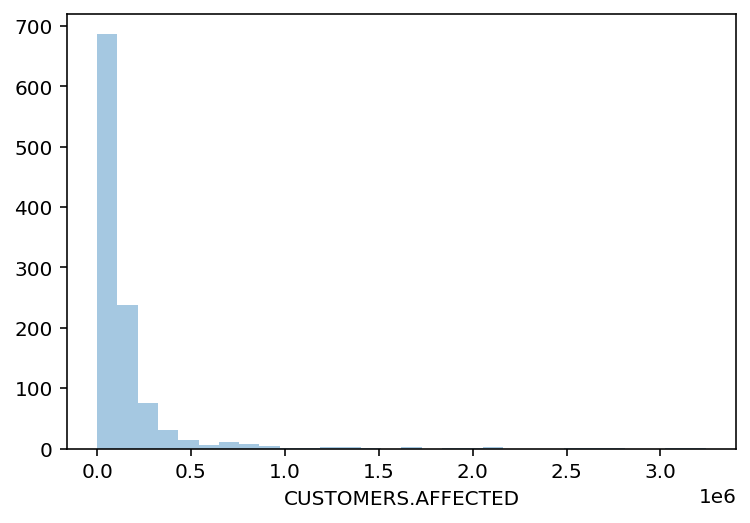

In [10]:
sns.distplot(df["CUSTOMERS.AFFECTED"], kde=False, bins=30)

<AxesSubplot:xlabel='OUTAGE.DURATION'>

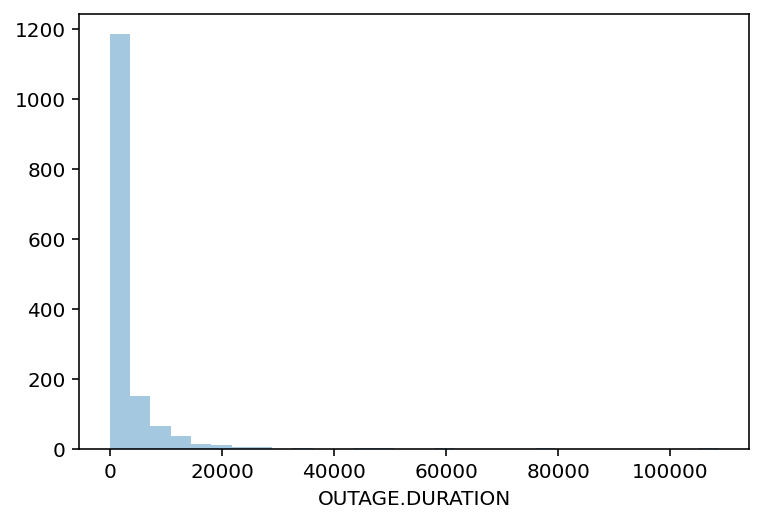

In [11]:
sns.distplot(df["OUTAGE.DURATION"], kde=False, bins=30)

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OUTAGE.DURATION', ylabel='CUSTOMERS.AFFECTED'>

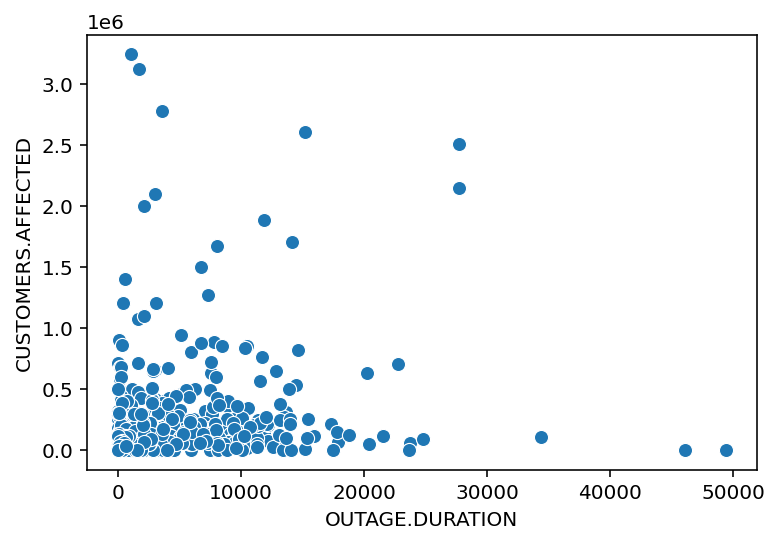

In [12]:
sns.scatterplot(df['OUTAGE.DURATION'], df['CUSTOMERS.AFFECTED'], s=50)

There is not a strong correlation, but we do see that majority of the data points cluster at lower left corner, where both number of customers affected and outage durations are small, which is quite intuitive.

We are interested in how outage duration varies for different state, which can be done using a choropleth map via folium.

In [13]:
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"

m = folium.Map(location=[48, -102], zoom_start=3)
folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=df,
    columns=['POSTAL.CODE', 'OUTAGE.DURATION'],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Outage Duration",
).add_to(m)

folium.LayerControl().add_to(m)

m

We notice that the outage duration was relatively low around West,South coast and Northern part of U.S., relatively longer duration in central states, and extremely high outage duration in New York. 

### Assessment of Missingness

In [45]:
# observe missingness
df.isnull().sum()

YEAR                        0
MONTH                       9
U.S._STATE                  0
POSTAL.CODE                 0
NERC.REGION                 0
CLIMATE.REGION              6
ANOMALY.LEVEL               9
CLIMATE.CATEGORY            9
CAUSE.CATEGORY              0
CAUSE.CATEGORY.DETAIL     471
HURRICANE.NAMES          1462
OUTAGE.DURATION            58
DEMAND.LOSS.MW            705
CUSTOMERS.AFFECTED        443
RES.PRICE                  22
COM.PRICE                  22
IND.PRICE                  22
TOTAL.PRICE                22
RES.SALES                  22
COM.SALES                  22
IND.SALES                  22
TOTAL.SALES                22
RES.PERCEN                 22
COM.PERCEN                 22
IND.PERCEN                 22
RES.CUSTOMERS               0
COM.CUSTOMERS               0
IND.CUSTOMERS               0
TOTAL.CUSTOMERS             0
RES.CUST.PCT                0
COM.CUST.PCT                0
IND.CUST.PCT                0
PC.REALGSP.STATE            0
PC.REALGSP

In [46]:
df.iloc[df['MONTH'][df['MONTH'].isnull()].index]

,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,CAUSE.CATEGORY,CAUSE.CATEGORY.DETAIL,HURRICANE.NAMES,OUTAGE.DURATION,DEMAND.LOSS.MW,CUSTOMERS.AFFECTED,RES.PRICE,COM.PRICE,IND.PRICE,TOTAL.PRICE,RES.SALES,COM.SALES,IND.SALES,TOTAL.SALES,RES.PERCEN,COM.PERCEN,IND.PERCEN,RES.CUSTOMERS,COM.CUSTOMERS,IND.CUSTOMERS,TOTAL.CUSTOMERS,RES.CUST.PCT,COM.CUST.PCT,IND.CUST.PCT,PC.REALGSP.STATE,PC.REALGSP.USA,PC.REALGSP.REL,PC.REALGSP.CHANGE,UTIL.REALGSP,TOTAL.REALGSP,UTIL.CONTRI,PI.UTIL.OFUSA,POPULATION,POPPCT_URBAN,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND,OUTAGE.RESTORATION,OUTAGE.START
239,2000.0,NaN,Texas,TX,FRCC,South,NaN,NaN,equipment failure,transformer outage,NaN,NaN,46,43000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8023266.0,1093414.0,61280.0,9299829.0,86.2733,11.7574,0.658937,45102,44745,1.00798,1.7,30908,944631,3.27197,10.3,20944499.0,84.7,9.35,2435.3,1539.9,15.2,3.35,0.58,97.2583,2.74204,2.09087,NaT,NaT
339,2000.0,NaN,Alabama,AL,SERC,Southeast,NaN,NaN,severe weather,thunderstorm,NaN,NaN,NaN,160000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1930037.0,313017.0,6252.0,2262753.0,85.296,13.8335,0.276301,33712,44745,0.753425,1.1,5704,150090,3.80039,2.2,4452173.0,59.04,10.39,1278.5,988.7,40.4,4.36,0.99,96.6139,3.38611,2.01831,NaT,NaT
365,2000.0,NaN,Illinois,IL,SERC,Central,NaN,NaN,severe weather,wildfire,NaN,NaN,NaN,11000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4748863.0,493670.0,5009.0,5282401.0,89.8997,9.34556,0.0948243,49276,44745,1.10126,2.8,15815,612709,2.58116,5.8,12434161.0,88.49,8.52,2877.6,1759.5,28.6,7.11,1.12,95.8646,4.13544,1.41589,NaT,NaT
766,2000.0,NaN,North Carolina,NC,SERC,Southeast,NaN,NaN,severe weather,thunderstorm,NaN,NaN,175,50000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3561203.0,513727.0,12577.0,4105711.0,86.7378,12.5125,0.306329,42201,44745,0.943144,1.5,8262,341051,2.42251,2.2,8081614.0,66.09,11.21,1367.2,1043.7,73.5,9.48,2.11,90.3361,9.66387,7.52894,NaT,NaT
887,2000.0,NaN,Delaware,DE,RFC,Northeast,NaN,NaN,system operability disruption,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,335282.0,40616.0,553.0,377219.0,88.8826,10.7672,0.146599,64013,44745,1.43062,2.1,1016,50338,2.01836,0.4,786373.0,83.3,14.59,1838.3,1083,97.3,20.88,6.21,78.3045,21.6955,3.65609,NaT,NaT
1318,2000.0,NaN,Virginia,VA,SERC,Southeast,NaN,NaN,equipment failure,relaying malfunction,NaN,NaN,143,37000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2767245.0,306821.0,5371.0,3122909.0,88.6111,9.82485,0.171987,47456,44745,1.06059,2.5,6978,337211,2.06933,1.8,7105817.0,75.45,5.66,2265.2,1179.2,53.3,6.75,0.97,92.3203,7.67972,2.99708,NaT,NaT
1506,2002.0,NaN,Kansas,KS,SPP,South,NaN,NaN,severe weather,winter storm,NaN,NaN,550,270000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1157820.0,194996.0,12885.0,1379347.0,83.9397,14.1368,0.934138,40525,45097,0.898619,1.1,2462,109966,2.23887,1.1,2713535.0,74.2,24.03,2176.5,1983,9.1,1.19,0.42,99.3692,0.632004,0.632004,NaT,NaT
1530,2006.0,NaN,North Dakota,ND,MRO,West North Central,NaN,NaN,fuel supply emergency,Coal,NaN,NaN,1650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,309997.0,53709.0,2331.0,366037.0,84.6901,14.6731,0.636821,42913,48909,0.877405,3.5,1019,27868,3.65652,0.7,649422.0,59.9,19.9,2192.2,1868.2,3.9,0.27,0.1,97.5996,2.40177,2.40177,NaT,NaT
1533,2000.0,NaN,Alaska,AK,ASCC,NaN,NaN,NaN,equipment failure,failure,NaN,NaN,35,14273.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,230534.0,38074.0,854.0,273530.0,84.2811,13.9195,0.312214,57401,44745,1.28285,-2.2,724,36046,2.00854,0.2,627963.0,66.02,21.56,1802.6,1276,0.4,0.05,0.02,85.7612,14.2388,2.90118,NaT,NaT


In [97]:
# permutation test for missingness on Year
n_df = df[['YEAR', 'MONTH']]
n_df = n_df.assign(isnull = df['MONTH'].isnull())
n_df.head()

,YEAR,MONTH,isnull
0,2011.0,7.0,False
1,2014.0,5.0,False
2,2010.0,10.0,False
3,2012.0,6.0,False
4,2015.0,7.0,False


In [98]:
# calculate the total variance diff
def tvd(df):
    cnts = df.pivot_table(index = 'isnull', columns = 'YEAR', aggfunc = 'size').fillna(0)
    distr = cnts / cnts.sum()
    return distr.diff(axis = 1).iloc[-1].abs().sum() / 2

In [99]:
obs = tvd(n_df)
tvds = []
N = 1000

for _ in range(N):
    shuffled_col = n_df['isnull'].sample(frac=1, replace=False).reset_index(drop=True)
    shuffled = n_df.assign(isnull=shuffled_col)
    tvds.append(tvd(shuffled))

In [100]:
p_val = round(sum(obs <= tvds) / N, 2)
p_val

0.0

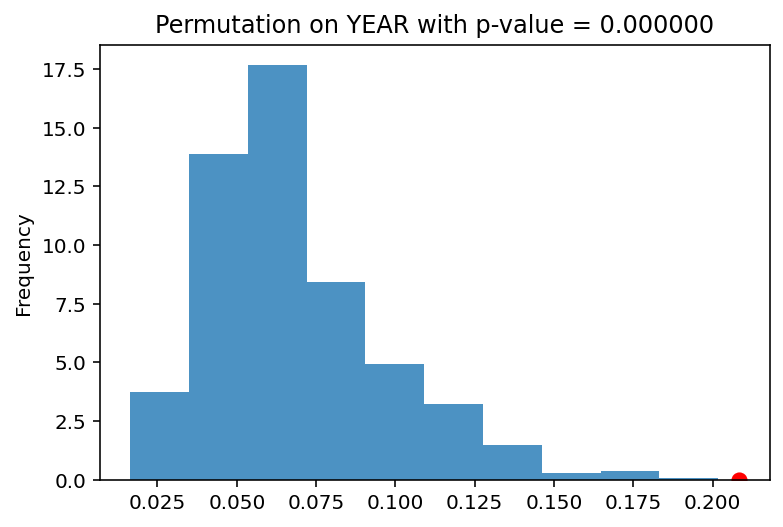

In [101]:
pd.Series(tvds).plot(kind='hist', density=True, alpha=0.8, title='Permutation on YEAR with p-value = %f' % p_val)
plt.scatter(obs, 0, color='r', s=50)

In [102]:
# Test on other columns
column_name = 'CAUSE.CATEGORY'
n_df = df[[column_name, 'MONTH']]
n_df = n_df.assign(isnull = df['MONTH'].isnull())

def tvd(df):
    cnts = df.pivot_table(index = 'isnull', columns = column_name, aggfunc = 'size').fillna(0)
    distr = cnts / cnts.sum()
    return distr.diff(axis = 1).iloc[-1].abs().sum() / 2

obs = tvd(n_df)
tvds = []
N = 1000

for _ in range(N):
    shuffled_col = n_df['isnull'].sample(frac=1, replace=False).reset_index(drop=True)
    shuffled = n_df.assign(isnull=shuffled_col)
    tvds.append(tvd(shuffled))
    
p_val = round(sum(obs <= tvds) / N, 2)

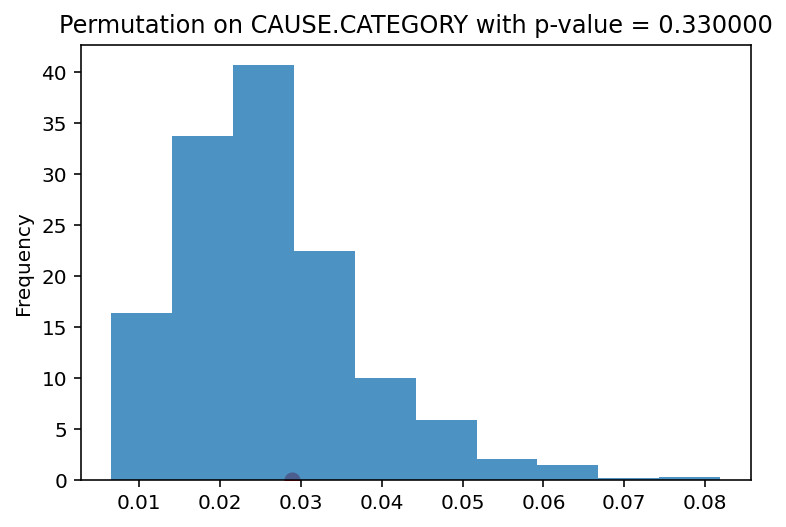

In [103]:
pd.Series(tvds).plot(kind='hist', density=True, alpha=0.8, title='Permutation on CAUSE.CATEGORY with p-value = %f' % p_val)
plt.scatter(obs, 0, color='r', s=50)

### Hypothesis Test

In [ ]:
# TODO